In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

#Generating synthetic dataset of 1000 observations, 20 features ,5 informatives ,5 redundant 

In [7]:
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=5, n_redundant=5, random_state=6)
# summarize the dataset
print(X.shape, y.shape)

(1000, 20) (1000,)


Applying Decision tree 


In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

DT=DecisionTreeClassifier()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(DT, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy using decision tree: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Accuracy using decision tree: 0.838 (0.031)


Applying Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

Log=LogisticRegression()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(Log, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy using Logistic regression : %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Accuracy using Logistic regression : 0.843 (0.031)


**Now using Adaboost with base learner as decision tree**

In [10]:
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier

# define the model
model = AdaBoostClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))
# print(cv)
# print(n_scores)
#Make predictions using adaboost for classification
model.fit(X,y)

#Make single prediction
row=[[-2.42264447e+00,  1.49687583e+00, -8.01106833e-01,  2.06453050e+00,-8.76754500e+00, -2.51286558e+00,  1.40156770e+00,  4.79941043e+00, 1.39750172e+00, -5.62485856e-01, -6.03669967e-01, -3.12565915e+00,-3.18175570e+00, -2.94187480e+00, -6.81902846e-03, -4.65861153e+00,-6.38341467e+00,  1.14726175e+00, -2.86306705e+00, -2.75750181e-01]]

y_hat=model.predict(row)
print("Original class: ",y[1])
print("Predicted class ",y_hat[0])

Accuracy: 0.852 (0.037)
Original class:  0
Predicted class  0


With svm as base estimator


In [11]:
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

# import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score
svc=SVC(probability=True, kernel='linear')

# define the model
model = AdaBoostClassifier(base_estimator=svc)
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))


Accuracy: 0.690 (0.074)


**Using Adaboost with logistic as base learner**

In [12]:
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier

from sklearn.linear_model import LogisticRegression

# define the model
model = AdaBoostClassifier(base_estimator=LogisticRegression())
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))
# print(cv)
# print(n_scores)
#Make predictions using adaboost for classification
model.fit(X,y)

#Make single prediction

row=[X[1]]
y_hat=model.predict(row)
print("Original class: ",y[1])
print("Predicted class with logistic as base estimator",y_hat[0])


Accuracy: 0.842 (0.035)


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Original class:  0
Predicted class with logistic as base estimator 0


Hyperparameter tuning with changing depth of the tree


>1 0.848 (0.042)
>2 0.858 (0.034)
>3 0.862 (0.034)
>4 0.880 (0.030)
>5 0.891 (0.035)
>6 0.896 (0.032)
>7 0.898 (0.030)
>8 0.907 (0.028)
>9 0.902 (0.032)
>10 0.903 (0.029)


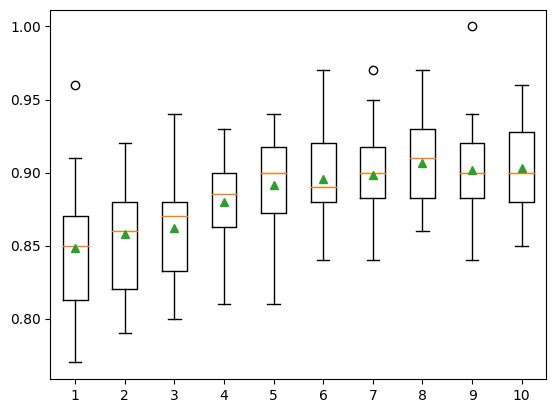

In [13]:
from sklearn.tree import DecisionTreeClassifier

def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=5, n_redundant=5)
	return X, y

def get_models():
	models=dict()
  #explore depths from 1 to 10
	for i in range(1,11):
		base=DecisionTreeClassifier(max_depth=i)
		models[str(i)]=AdaBoostClassifier(base_estimator=base)
	return models 
  
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

**Hyper parameter tuning with Grid Search CV**

In [14]:
# Hyperparameter tuning with Grid Search CV

from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=6)
# define the model with default hyperparameters
model = AdaBoostClassifier()
# define the grid of values to search
grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
# execute the grid search
grid_result = grid_search.fit(X, y)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.813667 using {'learning_rate': 0.1, 'n_estimators': 500}
0.646333 (0.036376) with: {'learning_rate': 0.0001, 'n_estimators': 10}
0.646667 (0.036545) with: {'learning_rate': 0.0001, 'n_estimators': 50}
0.646667 (0.036545) with: {'learning_rate': 0.0001, 'n_estimators': 100}
0.647000 (0.038136) with: {'learning_rate': 0.0001, 'n_estimators': 500}
0.646667 (0.036545) with: {'learning_rate': 0.001, 'n_estimators': 10}
0.647000 (0.038136) with: {'learning_rate': 0.001, 'n_estimators': 50}
0.654333 (0.045511) with: {'learning_rate': 0.001, 'n_estimators': 100}
0.672667 (0.046543) with: {'learning_rate': 0.001, 'n_estimators': 500}
0.648333 (0.042197) with: {'learning_rate': 0.01, 'n_estimators': 10}
0.671667 (0.045613) with: {'learning_rate': 0.01, 'n_estimators': 50}
0.715000 (0.053213) with: {'learning_rate': 0.01, 'n_estimators': 100}
0.767667 (0.045948) with: {'learning_rate': 0.01, 'n_estimators': 500}
0.716667 (0.048876) with: {'learning_rate': 0.1, 'n_estimators': 10}
0.767000

#Comparing the accuracy of all models
<table>
<tr>
<th>Using K fold</th>
<th>Accuracy</th>
</tr>
<tr>
<th>Decision Tree</th>
<th>0.838</th>
</tr><tr>
<th>Logistic regression</th>
<th>0.843</th>
</tr><tr>
<th>Adaboost Base learner=Decision tree</th>
<th>0.852</th>
</tr><tr>
<th>Adaboost Base learner=Logistic Regression</th>
<th>0.842</th>
</tr> 
</table>